Decision Tree Metrics:
Accuracy: 0.64
Precision: 0.14
Recall: 0.18
F1 Score: 0.16
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       162
           1       0.14      0.18      0.16        38

    accuracy                           0.64       200
   macro avg       0.47      0.46      0.46       200
weighted avg       0.67      0.64      0.65       200



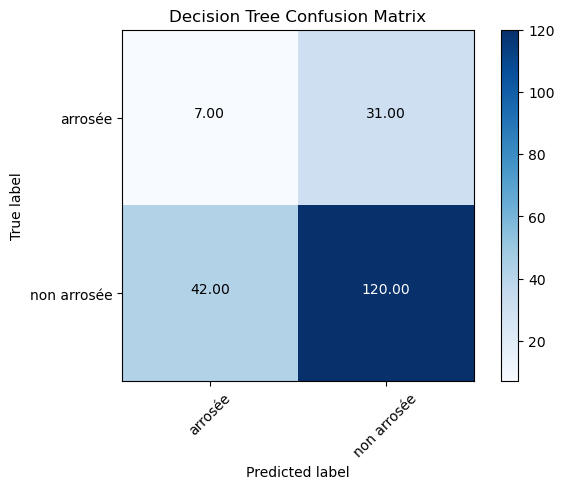

KNN Metrics:
Accuracy: 0.79
Precision: 0.22
Recall: 0.05
F1 Score: 0.09
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       162
           1       0.22      0.05      0.09        38

    accuracy                           0.79       200
   macro avg       0.52      0.50      0.48       200
weighted avg       0.70      0.79      0.73       200



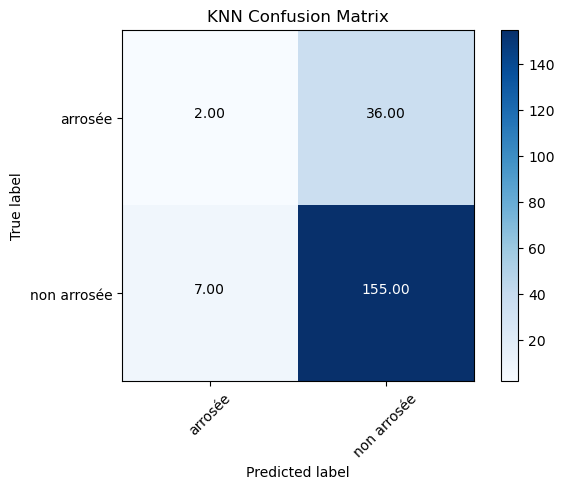

Random Forest Metrics:
Accuracy: 0.74
Precision: 0.07
Recall: 0.03
F1 Score: 0.04
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       162
           1       0.07      0.03      0.04        38

    accuracy                           0.74       200
   macro avg       0.43      0.47      0.45       200
weighted avg       0.66      0.74      0.70       200



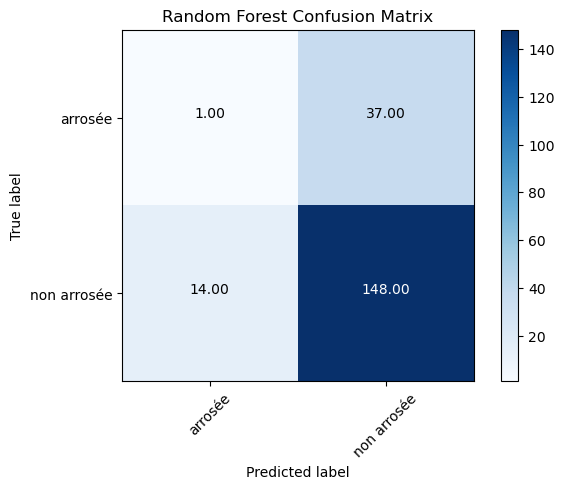

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import itertools

# Load the data
soildata = pd.read_csv('crop_data.csv')

# Rename columns
soildata.rename(columns={'moisture': 'Humidité', 'temp': 'Température', 'pump': 'Arrosage'}, inplace=True)


np.random.seed(42)
abc = np.random.rand(len(soildata)) *1.0
soildata['Humidité'] += abc
soildata['Température'] += abc

# Modify class distribution to make it more balanced
soildata.loc[soildata['Arrosage'] == 1, 'Arrosage'] = np.random.choice([1, 0], size=(sum(soildata['Arrosage'] == 1),), p=[0.4, 0.6])

# Prepare data
X = soildata.drop(['Arrosage', 'crop'], axis=1)
y = soildata['Arrosage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    plot_confusion_matrix(cm, classes=['arrosée', 'non arrosée'], title=f'{model_name} Confusion Matrix')

# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Evaluate Decision Tree Classifier
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Evaluate KNN Classifier
evaluate_model(y_test, y_pred_knn, "KNN")

# Evaluate Random Forest Classifier
evaluate_model(y_test, y_pred_rf, "Random Forest")
